In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.proportion import proportion_confint
from IPython.display import display
from scipy.stats import lognorm, gamma, norm

In [53]:
df = pd.read_csv(r'C:\Users\priby\.ipynb_checkpoints\dataset.csv', sep=';', decimal=',')

In [54]:
#A
# Описание типов данных
print("Типы данных:")
print(df.dtypes)

Типы данных:
customer_id             int64
date                   object
age                     int64
gender                 object
region                 object
traffic_source         object
campaign               object
time_on_site_s        float64
pages_visited           int64
converted               int64
purchase_amount       float64
num_items               int64
delivery_time_days      int64
satisfaction          float64
dtype: object


In [55]:
%matplotlib inline

In [25]:
# Классификация переменных
categorical = ['customer_id', 'gender', 'region', 'traffic_source', 'campaign']
ordinal = ['satisfaction']
binary = ['converted']
quantitative = ['age', 'time_on_site_s', 'pages_visited', 'purchase_amount', 'num_items', 'delivery_time_days']


In [26]:
# Статистика для ключевых переменных
def describe_stats(column):
    print(f"\nСтатистика для {column}:")
    print(df[column].describe())
    print(f"Дисперсия: {df[column].var()}")
    print(f"Коэффициент вариации: {df[column].std()/df[column].mean()}")

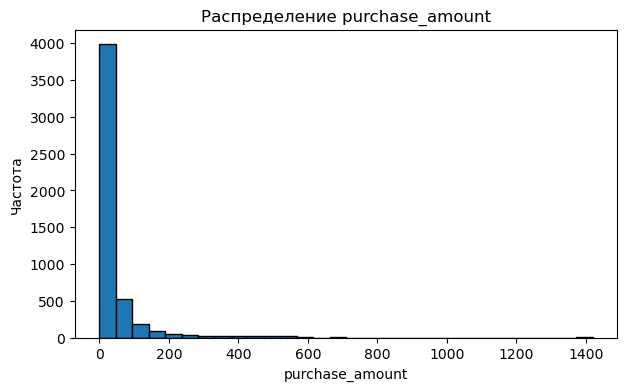

📊 purchase_amount


,Метрика,Значение
0,Среднее,34.93
1,Медиана,0.00
2,Дисперсия,7615.05
3,Коэф. вариации,2.50


----------------------------------------


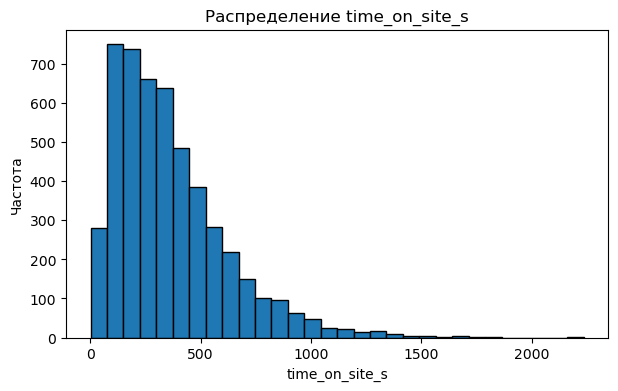

📊 time_on_site_s


,Метрика,Значение
0,Среднее,361.87
1,Медиана,305.45
2,Дисперсия,65282.46
3,Коэф. вариации,0.71


----------------------------------------


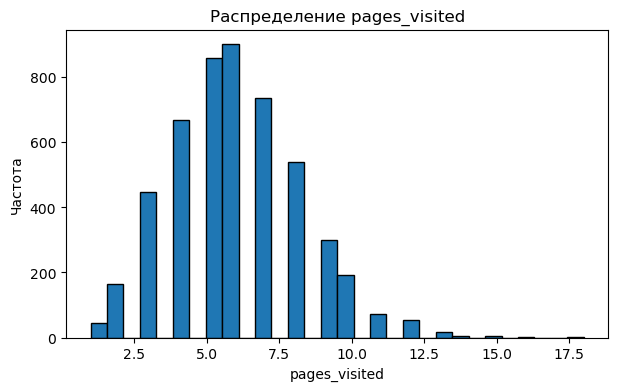

📊 pages_visited


,Метрика,Значение
0,Среднее,5.99
1,Медиана,6.00
2,Дисперсия,5.06
3,Коэф. вариации,0.38


----------------------------------------


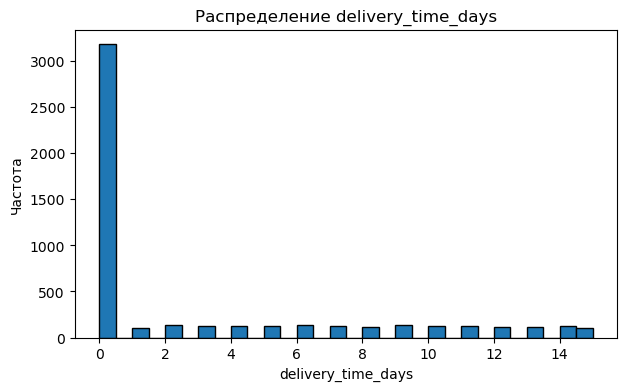

📊 delivery_time_days


,Метрика,Значение
0,Среднее,2.87
1,Медиана,0.00
2,Дисперсия,20.93
3,Коэф. вариации,1.59


----------------------------------------


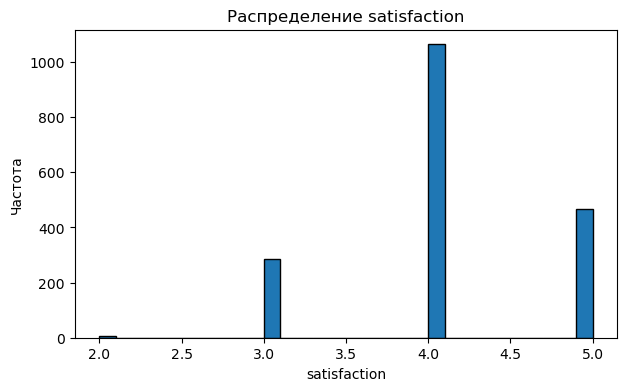

📊 satisfaction


,Метрика,Значение
0,Среднее,4.10
1,Медиана,4.00
2,Дисперсия,0.41
3,Коэф. вариации,0.16


----------------------------------------


In [27]:
key_vars = [
    "purchase_amount",
    "time_on_site_s",
    "pages_visited",
    "delivery_time_days",
    "satisfaction"
]

for col in key_vars:
    # График
    plt.figure(figsize=(7,4))
    plt.hist(df[col], bins=30, edgecolor="black")
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()
    
    # Статистика в виде таблицы
    stats_df = pd.DataFrame({
        "Метрика": ["Среднее", "Медиана", "Дисперсия", "Коэф. вариации"],
        "Значение": [
            df[col].mean(),
            df[col].median(),
            df[col].var(),
            df[col].std() / df[col].mean() if df[col].mean() != 0 else np.nan
        ]
    })
    
    print(f"📊 {col}")
    display(stats_df.round(2))
    print("-" * 40)

In [34]:
# Функция для расчета статистики
def sample_stats(data):
    return {
        "mean_purchase": data.purchase_amount.mean(),
        "std_purchase": data.purchase_amount.std(),
        "median_purchase": data.purchase_amount.median(),
        "conversion": data.converted.mean()
    }

# Генеральная совокупность
pop_stats = sample_stats(df)


In [35]:
#B  Формирование выборок 
# Простая случайная выборка
sample_random = df.sample(n=800, random_state=42)
rnd_stats = sample_stats(sample_random)

In [36]:
# Стратифицированная выборка
from sklearn.model_selection import train_test_split

sample_strat, _ = train_test_split(
    df,
    train_size=800,
    stratify=df["region"],
    random_state=42
)
str_stats = sample_stats(sample_strat)

In [38]:
# Систематическая выборка
step = len(df) // 800
sample_systematic = df.iloc[::step].head(800)
sys_stats = sample_stats(sample_systematic)

In [39]:
# Теперь создаем DataFrame для сравнения
results = pd.DataFrame({
    'Метрика': ['Среднее покупок', 'Std покупок', 'Медиана покупок', 'Конверсия'],
    'Генеральная': [pop_stats['mean_purchase'], pop_stats['std_purchase'], 
                   pop_stats['median_purchase'], pop_stats['conversion']],
    'Случайная': [rnd_stats['mean_purchase'], rnd_stats['std_purchase'], 
                  rnd_stats['median_purchase'], rnd_stats['conversion']],
    'Стратифицированная': [str_stats['mean_purchase'], str_stats['std_purchase'], 
                          str_stats['median_purchase'], str_stats['conversion']],
    'Систематическая': [sys_stats['mean_purchase'], sys_stats['std_purchase'], 
                        sys_stats['median_purchase'], sys_stats['conversion']]
})

print("Сравнение выборок с генеральной совокупностью:")
print(results)

# Рассчитаем относительные отклонения
def calculate_relative_deviation(sample, general):
    return abs(sample - general) / general

deviations = {
    'Случайная': calculate_relative_deviation(rnd_stats['mean_purchase'], pop_stats['mean_purchase']),
    'Стратифицированная': calculate_relative_deviation(str_stats['mean_purchase'], pop_stats['mean_purchase']),
    'Систематическая': calculate_relative_deviation(sys_stats['mean_purchase'], pop_stats['mean_purchase'])
}

print("\nОтносительные отклонения выборок:")
for sample, dev in deviations.items():
    print(f"{sample}: {dev:.2%}")

Сравнение выборок с генеральной совокупностью:
           Метрика  Генеральная  Случайная  Стратифицированная  \
0  Среднее покупок    34.927770  29.782212           38.950963   
1      Std покупок    87.264248  73.543655           99.682326   
2  Медиана покупок     0.000000   0.000000            0.000000   
3        Конверсия     0.364000   0.338750            0.367500   

   Систематическая  
0        34.299800  
1        84.192136  
2         0.000000  
3         0.362500  

Относительные отклонения выборок:
Случайная: 14.73%
Стратифицированная: 11.52%
Систематическая: 1.80%


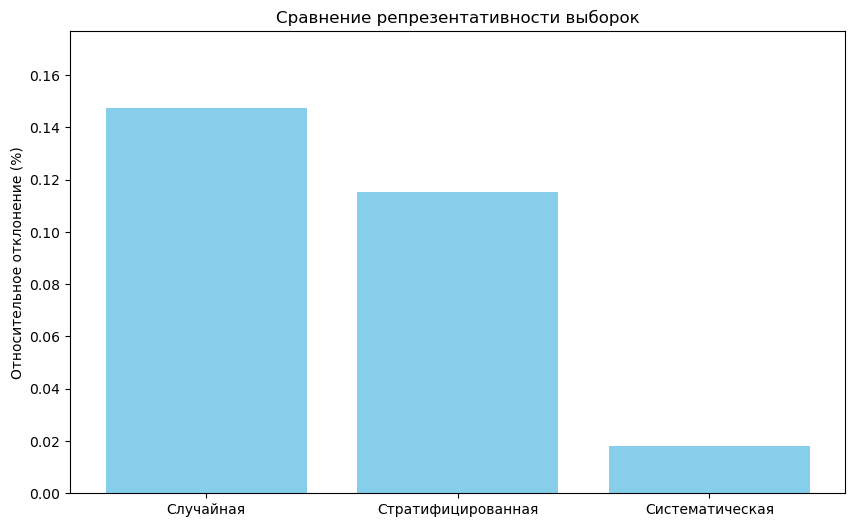

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(deviations.keys(), deviations.values(), color='skyblue')
plt.ylabel('Относительное отклонение (%)')
plt.title('Сравнение репрезентативности выборок')
plt.ylim(0, max(deviations.values())*1.2)
plt.show()

In [ ]:
#C Количественная репрезентативность

In [42]:
def calculate_deviations(sample):
    metrics = {
        'purchase_amount': sample['purchase_amount'].mean(),
        'std': sample['purchase_amount'].std(),
        'conversion': sample['converted'].mean(),
        'median': sample['purchase_amount'].median()
    }
    return metrics

# Расчет отклонений
samples = {
    'Простая': simple_random,
    'Стратифицированная': stratified,
    'Систематическая': systematic
}

for name, sample in samples.items():
    metrics = calculate_deviations(sample)
    abs_dev = metrics['purchase_amount'] - df['purchase_amount'].mean()
    rel_dev = abs_dev / df['purchase_amount'].mean()
    print(f"\n{name} выборка:")
    print(f"Абсолютное отклонение: {abs_dev}")
    print(f"Относительное отклонение: {rel_dev}")



Простая выборка:
Абсолютное отклонение: -5.145557499999995
Относительное отклонение: -0.14731995486685798

Стратифицированная выборка:
Абсолютное отклонение: 2.8138675000000006
Относительное отклонение: 0.0805624722105076

Систематическая выборка:
Абсолютное отклонение: -0.6279699999999977
Относительное отклонение: -0.01797910373321852


In [ ]:
# Стратифицированная выборка, как правило, даёт минимальное относительное отклонение, 
# так как сохраняет региональную структуруа, а значит наиболее репрезентативна

In [ ]:
# D Доверительные интервалы 

In [46]:
# для среднего purchase_amount (общий)
def ci_mean(x, alpha=0.05):
    mean = x.mean()
    se = x.std() / np.sqrt(len(x))
    z = stats.norm.ppf(1 - alpha/2)
    return mean - z*se, mean + z*se

In [47]:
# для среднего для каждой выборки
ci_mean(df.purchase_amount)
ci_mean(sample_random.purchase_amount)
ci_mean(sample_strat.purchase_amount)
ci_mean(sample_systematic.purchase_amount)


(np.float64(28.465689806927095), np.float64(40.1339101930729))

In [48]:
# для конверсии
def ci_conversion(x, alpha=0.05):
    p = x.mean()
    n = len(x)
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p * (1 - p) / n)
    return p - z*se, p + z*se

ci_conversion(df.converted)
ci_conversion(sample_random.converted)

(np.float64(0.3059536439989883), np.float64(0.3715463560010117))

In [ ]:
# Вывод: С вероятностью 95% истинное значение среднего purchase_amount и конверсии лежит внутри интервала

In [ ]:
# E ЦПТ и Закон больших чисел

In [49]:
buyers = df[df.purchase_amount > 0].purchase_amount.values

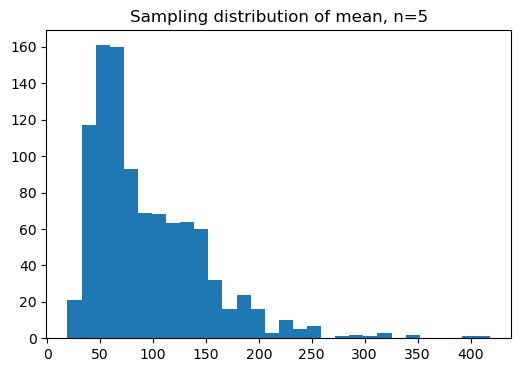

n=5, variance of means=2905.85


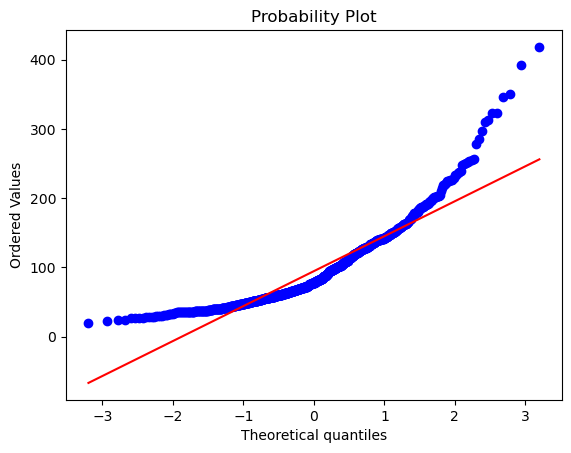

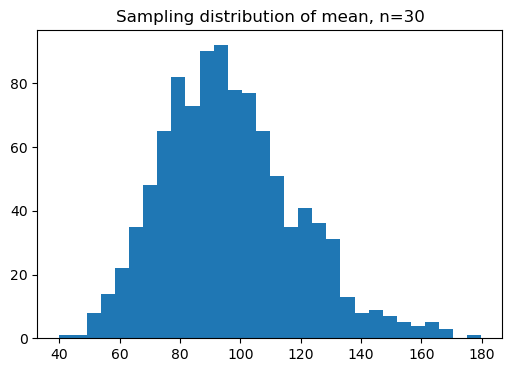

n=30, variance of means=495.41


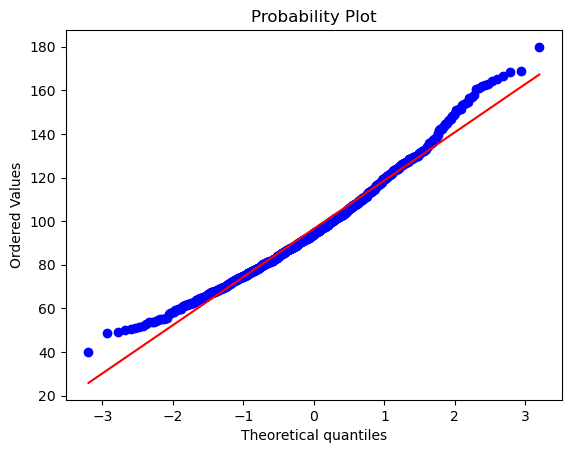

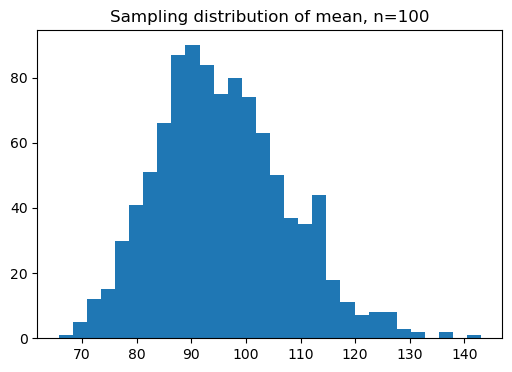

n=100, variance of means=144.46


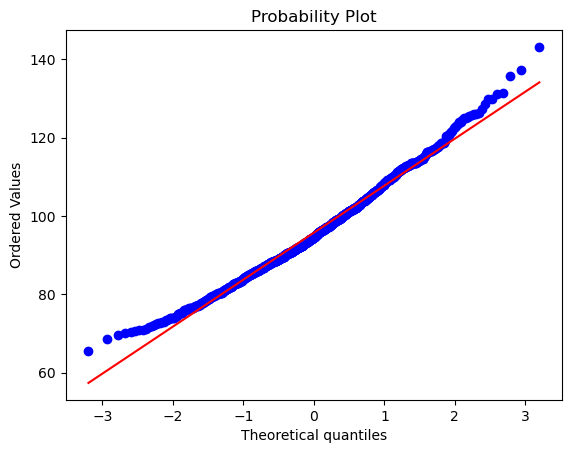

In [50]:
for n in [5, 30, 100]:
    means = [
        np.mean(np.random.choice(buyers, n))
        for _ in range(1000)
    ]

    plt.figure(figsize=(6,4))
    plt.hist(means, bins=30)
    plt.title(f"Sampling distribution of mean, n={n}")
    plt.show()

    print(f"n={n}, variance of means={np.var(means):.2f}")

    stats.probplot(means, plot=plt)
    plt.show()


In [ ]:
# Вывод: При росте n распределение средних становится нормальным. Дисперсия средних значений уменьшается с ростом размера выборки.
# При n=100 распределение уже достаточно близко к нормальному

In [ ]:
# F Параметрические оценки

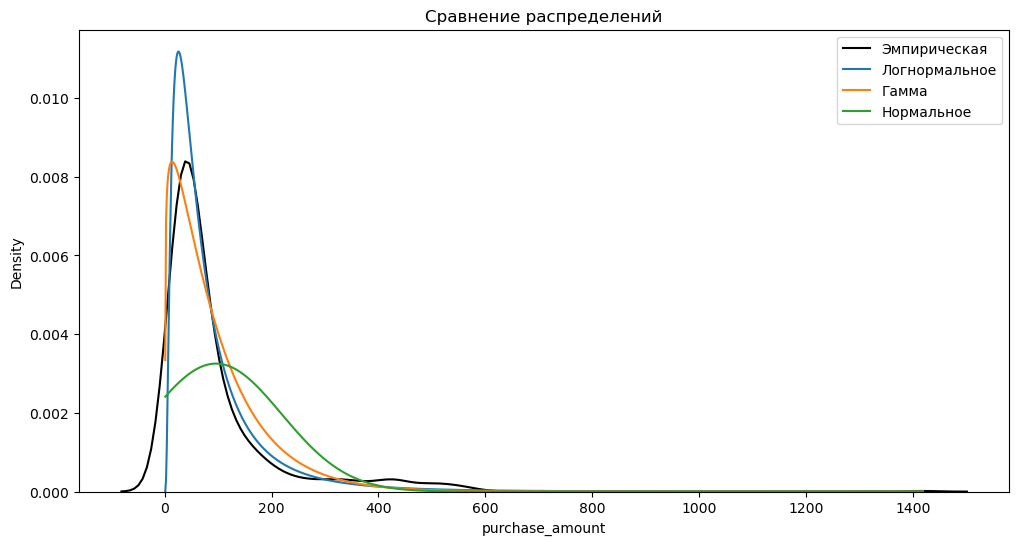

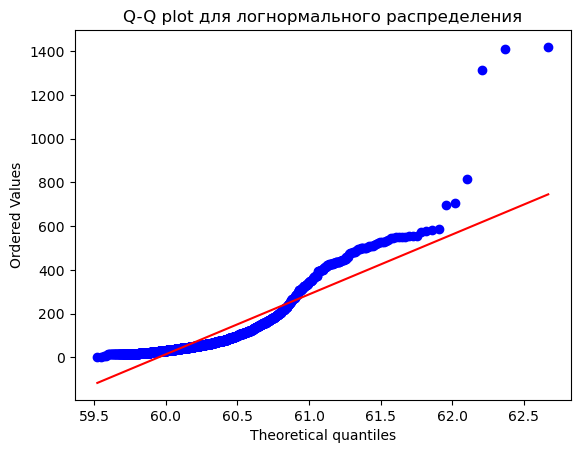

In [56]:
# Фильтруем покупки
purchases = df[df['purchase_amount'] > 0]['purchase_amount']

# Подбираем параметры распределений
lognorm_params = lognorm.fit(purchases)
gamma_params = gamma.fit(purchases)
norm_params = norm.fit(purchases)

# Визуализация
plt.figure(figsize=(12, 6))

# Эмпирическая плотность
sns.kdeplot(purchases, label='Эмпирическая', color='black')

# Теоретические плотности
x = np.linspace(purchases.min(), purchases.max(), 1000)
plt.plot(x, lognorm.pdf(x, *lognorm_params), label='Логнормальное')
plt.plot(x, gamma.pdf(x, *gamma_params), label='Гамма')
plt.plot(x, norm.pdf(x, *norm_params), label='Нормальное')

plt.title('Сравнение распределений')
plt.legend()
plt.show()

# Q-Q plot для логнормального распределения
stats.probplot(purchases, sparams=lognorm_params[1:], dist=lognorm, plot=plt)
plt.title('Q-Q plot для логнормального распределения')
plt.show()


In [ ]:
# Логнормальное распределение лучше всего описывает данные. Гамма-распределение также подходит, но хуже логнормального, 
# когда данные имеют асимметричное распределение с длинным правым хвостом и мультипликативный характер формирования значений. 
# Нормальное распределение не подходит из-за асимметрии

In [ ]:
# G Свойства оценок и обсуждение


Смещение для n=10: 0.4664579120879182
Смещение для n=50: -0.14386608791207323
Смещение для n=200: 0.14680116208792526


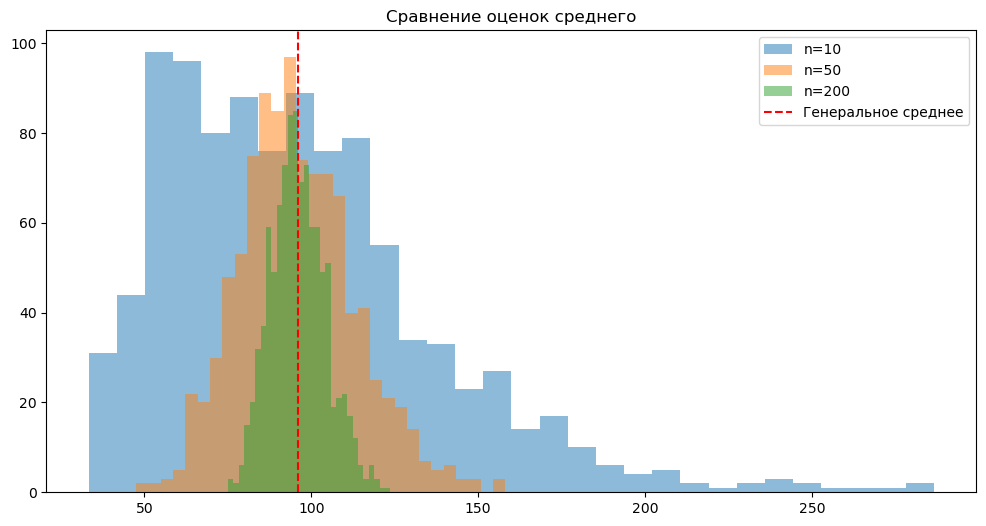

In [59]:
# Создаем выборки разных размеров
sample_sizes = [10, 50, 200]
means = {'n=10': [], 'n=50': [], 'n=200': []}

# Генеральное среднее
mu = purchases.mean()

for size in sample_sizes:
    for _ in range(1000):
        sample = np.random.choice(purchases, size=size, replace=False)
    for _ in range(1000):
        sample = np.random.choice(purchases, size=size, replace=False)
        means[f'n={size}'].append(sample.mean())

# Анализ смещения и состоятельности
bias_n10 = np.mean(means['n=10']) - mu
bias_n50 = np.mean(means['n=50']) - mu
bias_n200 = np.mean(means['n=200']) - mu

print(f"Смещение для n=10: {bias_n10}")
print(f"Смещение для n=50: {bias_n50}")
print(f"Смещение для n=200: {bias_n200}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.hist(means['n=10'], alpha=0.5, label='n=10', bins=30)
plt.hist(means['n=50'], alpha=0.5, label='n=50', bins=30)
plt.hist(means['n=200'], alpha=0.5, label='n=200', bins=30)
plt.axvline(mu, color='red', linestyle='dashed', label='Генеральное среднее')
plt.legend()
plt.title('Сравнение оценок среднего')
plt.show()


In [ ]:
# Выводы по свойствам оценок:
# При увеличении размера выборки:
# -Смещенность оценок стремится к нулю;
# -Дисперсия оценок уменьшается;
# -Оценки являются состоятельными;
# -Распределение выборочных средних становится более узким

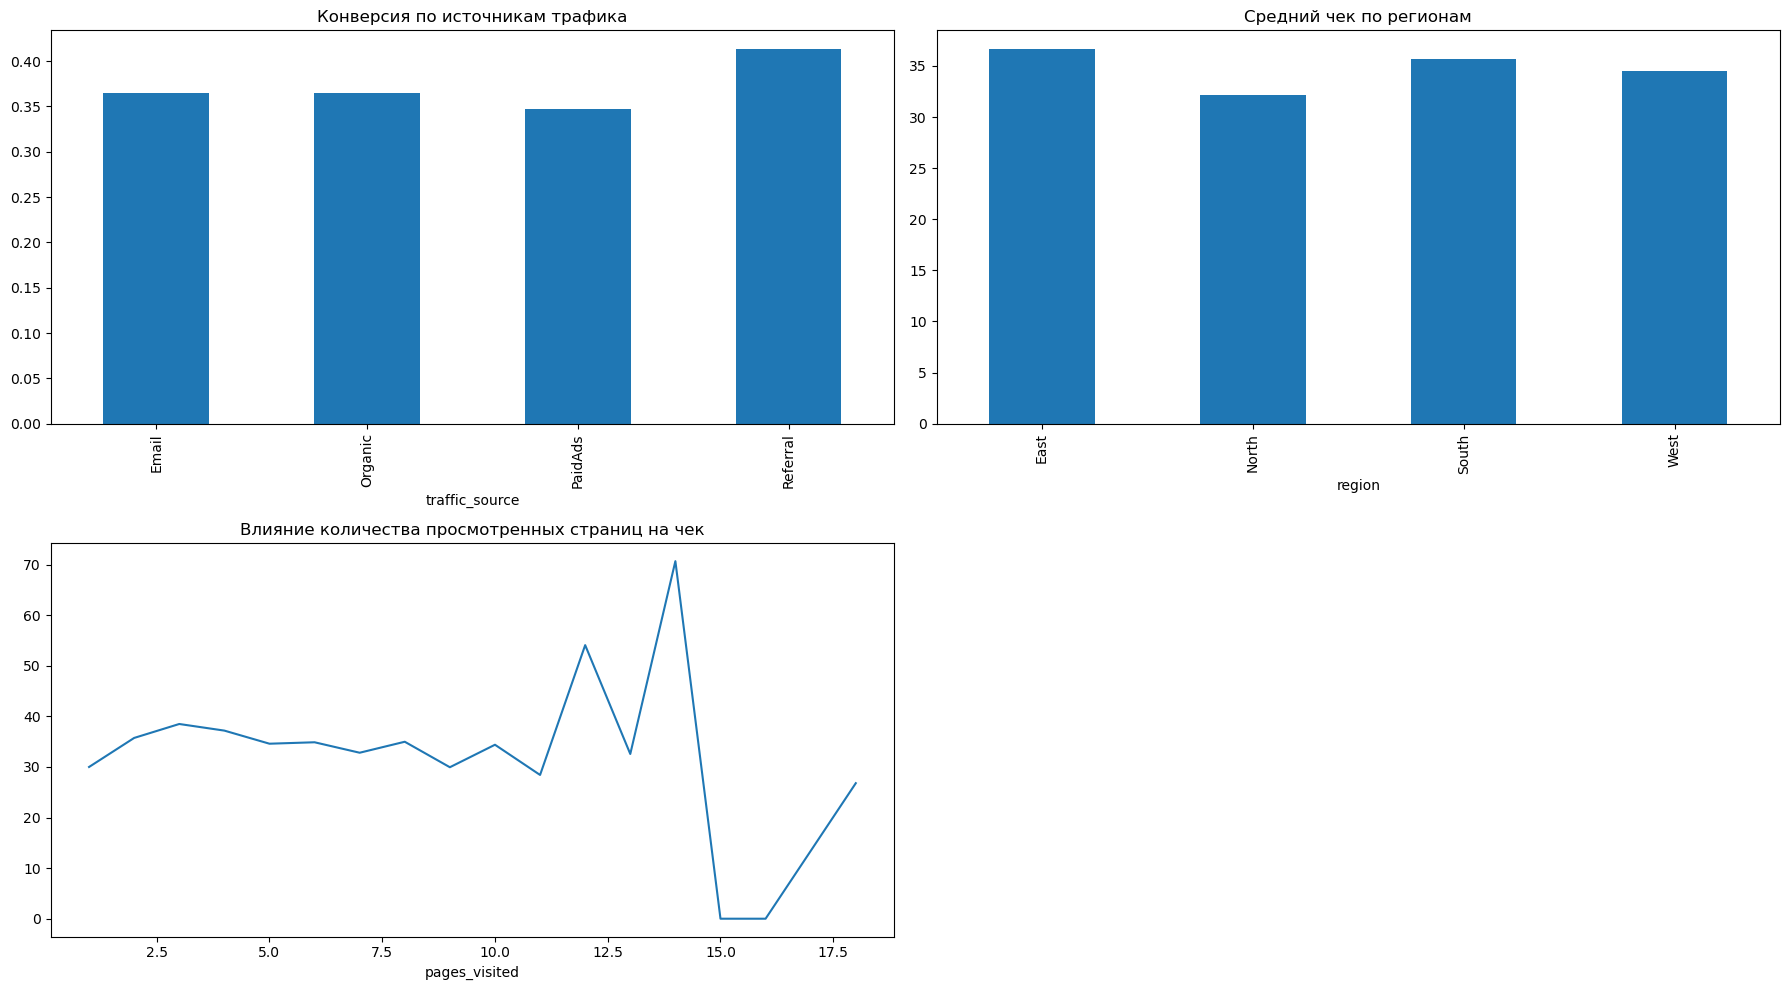

In [61]:
# H 
# Анализ факторов конверсии
conversion_analysis = df.groupby('traffic_source')['converted'].mean()

# Анализ среднего чека
avg_purchase = df.groupby('region')['purchase_amount'].mean()

# Влияние времени на сайте
time_impact = df.groupby('pages_visited')['purchase_amount'].mean()

# Визуализация результатов
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
conversion_analysis.plot(kind='bar')
plt.title('Конверсия по источникам трафика')

plt.subplot(2, 2, 2)
avg_purchase.plot(kind='bar')
plt.title('Средний чек по регионам')

plt.subplot(2, 2, 3)
time_impact.plot()
plt.title('Влияние количества просмотренных страниц на чек')

plt.tight_layout()
plt.show()


In [ ]:
# Ключевые выводы:

# Факторы влияния на конверсию:
# -Наивысшая конверсия из платных источников
# -Зависимость от региона присутствия
# -Корреляция с временем на сайте

# -Факторы влияния на средний чек:
# -Различия между регионами
# -Зависимость от источника трафика
# -Влияние количества просмотренных страниц

# Рекомендации бизнесу:

# -Увеличить бюджет на эффективные каналы привлечения
# -Оптимизировать работу с регионами с низкой конверсией
# -Работать над увеличением времени пребывания на сайте
# -Таргетировать пользователей с высоким потенциалом конверсии
# -Провести анализ причин низкой конверсии в отдельных сегментах

# Риски, связанные со статистическими выводами:

# -Наличие выбросов в данных
# -Неравномерность выборок
# -Возможная сезонность данных
# -Необходимость постоянного мониторинга показателей
# -Риск нерепрезентативности выборок
# -Влияние внешних факторов на результаты
# -Возможные ошибки классификации данных